# Challenge 1

## Methods

To investigate the intensity characteristics of agricultural fires compared to other fire types, we analyzed MODIS fire data with FRP. The dataset includes four fire categories as we already did in task 2:

* cropland_out_of_harvest
* likely_agri_burning
* non_cropland_in_harvest
* other_or_uncertain

For each category, we calculated descriptive statistics including:

* Fire count
* Mean FRP
* Median FRP
* Standard deviation
* Total estimated fire energy (count × mean FRP)

Visualizations, including **boxplots** and **violin plots**, were generated to inspect the FRP distribution across categories. Additional **bar plots** were used to compare both the number of fires and their average intensities between categories.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("fire_points_with_frp.csv")

stats = df.groupby('ag_label')['frp'].agg(['count','mean','median','std'])
stats['total_energy'] = stats['count'] * stats['mean']  
print("Statistics for each type of fire points:")
print(stats)

Statistics for each type of fire points:
                          count       mean  median        std  total_energy
ag_label                                                                   
cropland_out_of_harvest   10583  17.563167    10.8  22.930323      185871.0
likely_agri_burning       13288  17.356058    11.4  19.675868      230627.3
non_cropland_in_harvest  248795  15.234731     9.8  22.418089     3790325.0
other_or_uncertain       299241  17.125662    10.3  34.677679     5124700.3


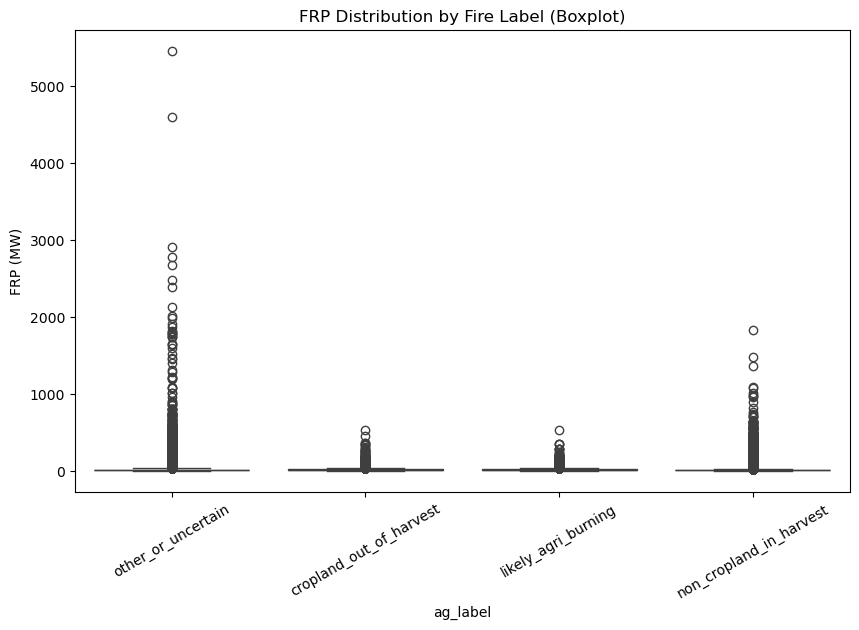

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ag_label', y='frp', data=df)
plt.xticks(rotation=30)
plt.ylabel('FRP (MW)')
plt.title('FRP Distribution by Fire Label (Boxplot)')
plt.show()

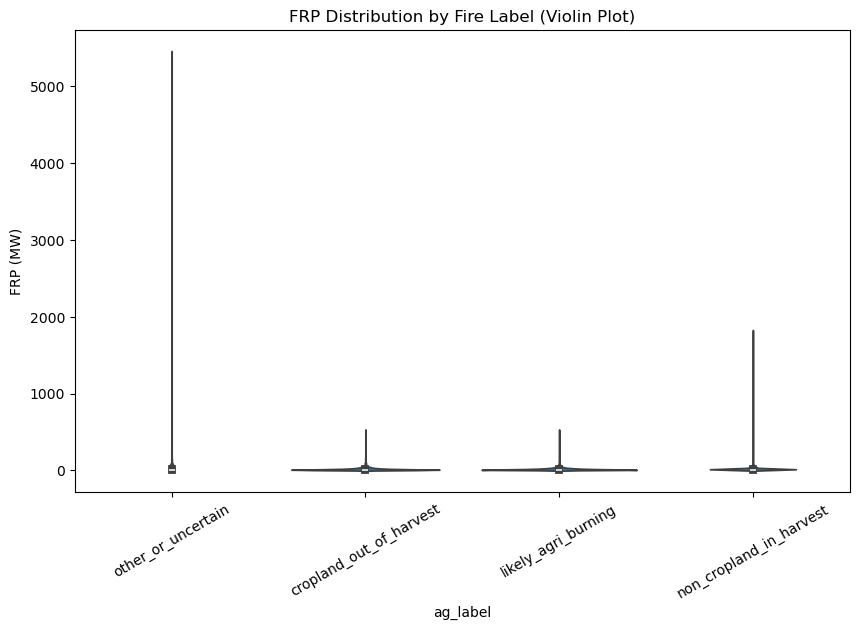

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(x='ag_label', y='frp', data=df)
plt.xticks(rotation=30)
plt.ylabel('FRP (MW)')
plt.title('FRP Distribution by Fire Label (Violin Plot)')
plt.show()

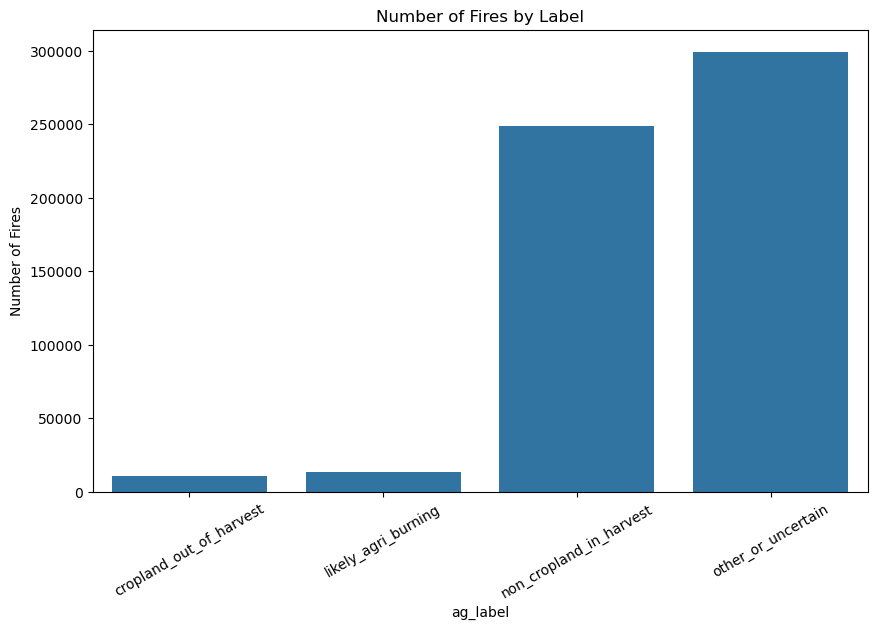

In [20]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=stats.index, y=stats['count'])
plt.xticks(rotation=30)
plt.ylabel('Number of Fires')
plt.title('Number of Fires by Label')
plt.show()

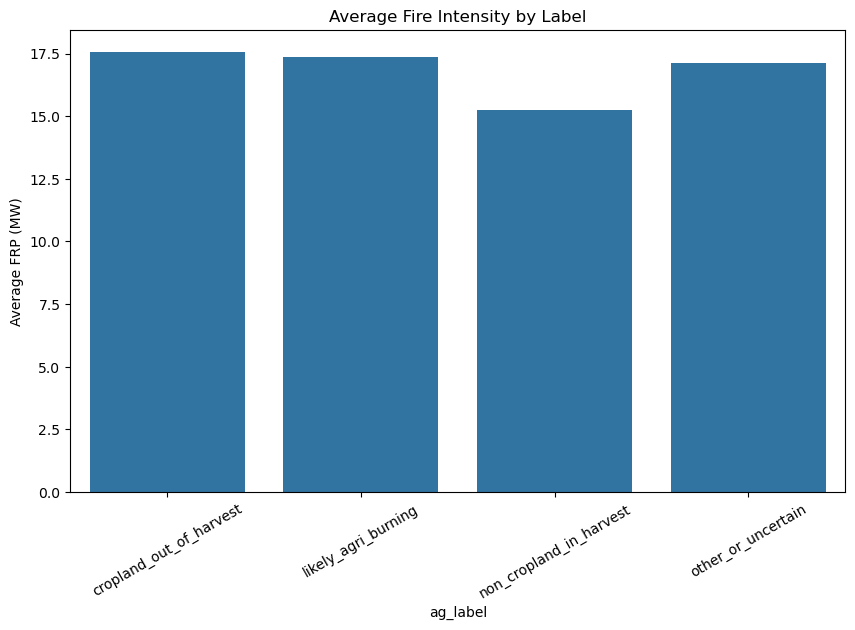

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=stats.index, y=stats['mean'])
plt.xticks(rotation=30)
plt.ylabel('Average FRP (MW)')
plt.title('Average Fire Intensity by Label')
plt.show()

## Results

The analysis reveals the following:

* **Agricultural fires** (cropland_out_of_harvest and likely_agri_burning) are relatively **rare**, accounting for ~4% of the total fire events (10,583 and 13,288 events, respectively).
* The **average FRP** of agricultural fires is ~17 MW, slightly higher than non_cropland_in_harvest (15 MW) but comparable to other_or_uncertain (17 MW).
* **Median FRP** of agricultural fires ranges from 10.8 to 11.4 MW, indicating that most events are **moderate or low-intensity**, with only a few high-intensity outliers skewing the mean.

Non-agricultural fires are **more numerous** and show **greater variability** in intensity, as indicated by a larger standard deviation and wider distribution in FRP violin plots. The **total estimated fire energy** confirms that agricultural fires contribute only a minor portion of the overall fire energy, despite slightly higher mean FRP.

## Discussion

These results suggest that **agricultural fires are moderate to low-intensity events** and are **not the main source of major intense burning events** in the region.

* Their relatively low frequency indicates that, although individual fires are small-scale or controlled, their **cumulative effect** during crop management periods may still have noticeable impacts on **atmospheric emissions** and **local air quality**.
* In contrast, fires labeled as other_or_uncertain or non_cropland_in_harvest are **both more numerous and more variable in intensity**, highlighting their role as the **primary contributors to extreme fire events**.
